In [ ]:
import pandas as pd
df = pd.read_csv('train_dataset.csv')

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [ ]:
df['Age'] = df['Age']//365
df['Sex'].replace({'F':0,'M':1},inplace=True)
df['Spiders'].replace({'N':0,'Y':1},inplace=True)
df['Ascites'].replace({'N':0,'Y':1},inplace=True)
df['Hepatomegaly'].replace({'N':0,'Y':1},inplace=True)
df['Drug'].replace({'D=penicillamine':0,'Placebo':1},inplace=True)

In [ ]:
df.dropna(subset=['Ascites','Hepatomegaly','Drug','Alk_Phos'],how='all',inplace=True)

In [ ]:
df.shape

(6556, 20)

In [ ]:
na_col = list()
for x in df.columns:
  print("No of NAN in {} = {}".format(x,df[x].isna().sum()))
  if(df[x].isna().sum() != 0):
    na_col.append(x)

No of NAN in ID = 0
No of NAN in N_Days = 0
No of NAN in Status = 0
No of NAN in Drug = 1781
No of NAN in Age = 0
No of NAN in Sex = 0
No of NAN in Ascites = 2002
No of NAN in Hepatomegaly = 2183
No of NAN in Spiders = 2483
No of NAN in Edema = 0
No of NAN in Bilirubin = 0
No of NAN in Cholesterol = 2974
No of NAN in Albumin = 0
No of NAN in Copper = 2063
No of NAN in Alk_Phos = 2407
No of NAN in SGOT = 2016
No of NAN in Tryglicerides = 2710
No of NAN in Platelets = 322
No of NAN in Prothrombin = 151
No of NAN in Stage = 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a91a653d0>,
      dtype=object)

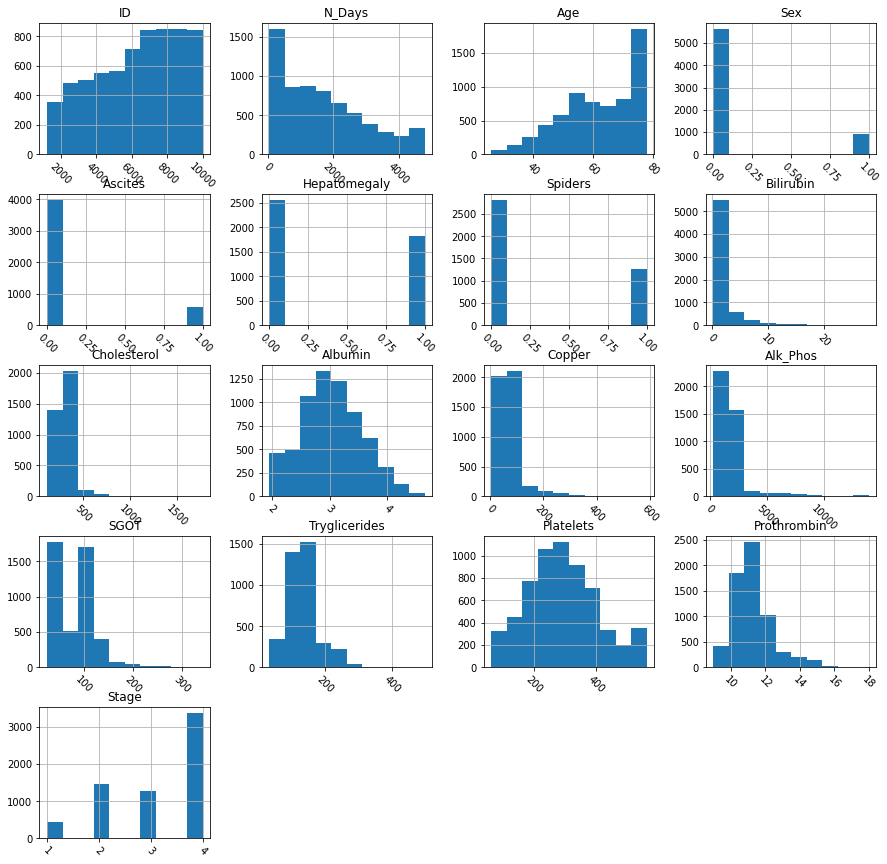

In [ ]:
df.hist(figsize=(15,15), xrot=-45, bins=10)

In [ ]:
df.describe()

,ID,N_Days,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6556.000000,6556.000000,6556.000000,6556.000000,4554.000000,4373.000000,4073.000000,6556.000000,3582.000000,6556.000000,4493.000000,4149.000000,4540.000000,3846.000000,6234.000000,6405.000000,6556.000000
mean,6272.809640,1661.478646,62.106162,0.141550,0.127580,0.415962,0.310091,1.814643,294.733389,3.033973,68.464500,1805.280381,79.557526,133.773011,293.031601,11.227588,3.155735
std,2403.335234,1329.951110,12.815883,0.348614,0.333658,0.492943,0.462587,3.231734,129.026733,0.527510,59.821398,1628.035891,43.517510,47.408923,115.221608,1.118330,0.993955
min,1239.000000,41.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4358.750000,538.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.300000,204.000000,2.680000,26.000000,1120.600000,35.350000,114.000000,213.000000,10.500000,2.000000
50%,6602.500000,1444.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.400000,312.000000,3.020000,68.000000,1561.900000,88.335000,128.000000,284.000000,11.100000,4.000000
75%,8300.250000,2510.250000,74.000000,0.000000,0.000000,1.000000,1.000000,1.800000,353.000000,3.390000,91.000000,2007.800000,110.657500,140.000000,364.000000,11.700000,4.000000
max,9999.000000,4795.000000,78.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


In [ ]:
values = {"Prothrombin": df['Prothrombin'].mean(), "Albumin": df['Albumin'].mean(),"Copper": df['Copper'].mean()}
df.fillna(value=values,inplace=True)

In [ ]:
d = {'Drug':0}
df.fillna(value=d,inplace=True)

In [ ]:
na_col = list()
for x in df.columns:
  print("No of NAN in {} = {}".format(x,df[x].isna().sum()))
  if(df[x].isna().sum() != 0):
    na_col.append(x)

No of NAN in ID = 0
No of NAN in N_Days = 0
No of NAN in Status = 0
No of NAN in Drug = 0
No of NAN in Age = 0
No of NAN in Sex = 0
No of NAN in Ascites = 2002
No of NAN in Hepatomegaly = 2183
No of NAN in Spiders = 2483
No of NAN in Edema = 0
No of NAN in Bilirubin = 0
No of NAN in Cholesterol = 2974
No of NAN in Albumin = 0
No of NAN in Copper = 0
No of NAN in Alk_Phos = 2407
No of NAN in SGOT = 2016
No of NAN in Tryglicerides = 2710
No of NAN in Platelets = 322
No of NAN in Prothrombin = 0
No of NAN in Stage = 0


In [ ]:
df.dropna(subset=['Cholesterol','Alk_Phos','SGOT'],how='all',inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8a92df50>,
      dtype=object)

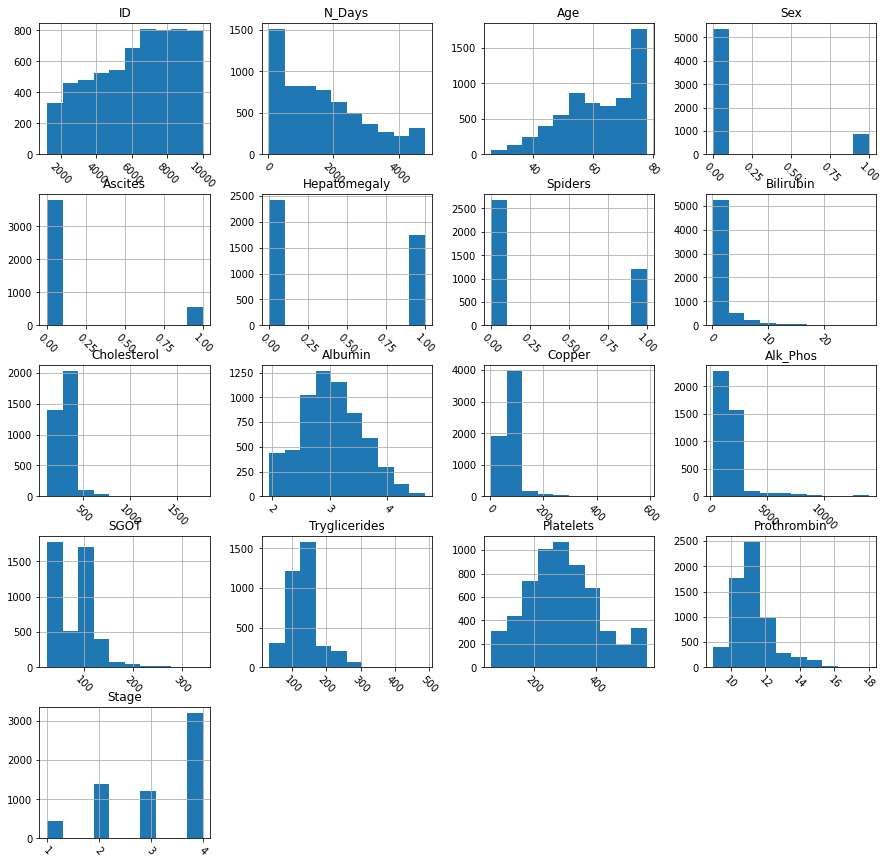

In [ ]:
df.hist(figsize=(15,15), xrot=-45, bins=10)

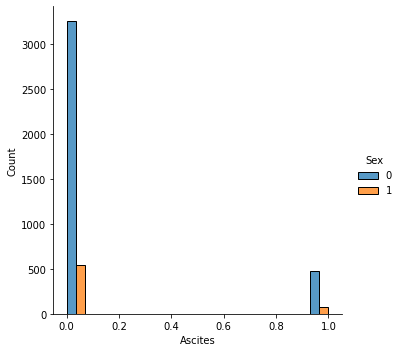

In [ ]:
import seaborn as sns

sns.displot(x=df.Ascites,hue=df.Sex,multiple="dodge")

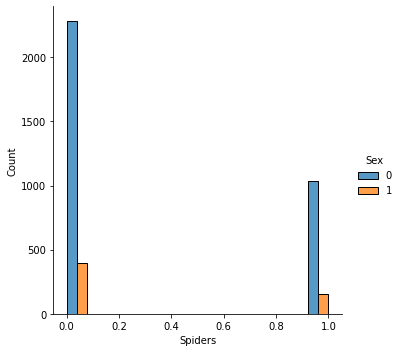

In [ ]:
sns.displot(x=df.Spiders,hue=df.Sex,multiple="dodge")

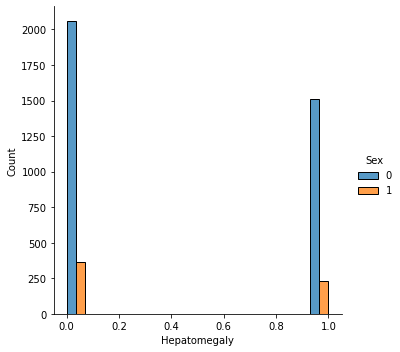

In [ ]:
sns.displot(x=df.Hepatomegaly,hue=df.Sex,multiple='dodge')

In [ ]:
na_col = list()
for x in df.columns:
  print("No of NAN in {} = {}".format(x,df[x].isna().sum()))
  if(df[x].isna().sum() != 0):
    na_col.append(x)

No of NAN in ID = 0
No of NAN in N_Days = 0
No of NAN in Status = 0
No of NAN in Drug = 0
No of NAN in Age = 0
No of NAN in Sex = 0
No of NAN in Ascites = 1898
No of NAN in Hepatomegaly = 2077
No of NAN in Spiders = 2366
No of NAN in Edema = 0
No of NAN in Bilirubin = 0
No of NAN in Cholesterol = 2657
No of NAN in Albumin = 0
No of NAN in Copper = 0
No of NAN in Alk_Phos = 2090
No of NAN in SGOT = 1699
No of NAN in Tryglicerides = 2584
No of NAN in Platelets = 301
No of NAN in Prothrombin = 0
No of NAN in Stage = 0


In [ ]:
y = pd.get_dummies(df.Edema, prefix='Edema')
y.drop(columns='Edema_S',inplace=True)

In [ ]:
df = pd.concat([df,y],axis=1)
df.drop(columns = 'Edema',inplace=True)

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y
0,7135,1654,CL,D-penicillamine,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0
1,7326,41,C,D-penicillamine,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0
2,7254,297,D,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0
3,3135,1872,C,D-penicillamine,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0
4,2483,939,CL,D-penicillamine,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0


In [ ]:
df['Status'].unique()

array(['CL', 'C', 'D'], dtype=object)

In [ ]:
x = pd.get_dummies(df.Status, prefix='Status')
x.drop(columns='Status_D',inplace=True)

In [ ]:
df = pd.concat([df,x],axis=1)
df.drop(columns='Status',inplace=True)
df.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,7135,1654,D-penicillamine,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,7326,41,D-penicillamine,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,7254,297,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,3135,1872,D-penicillamine,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2483,939,D-penicillamine,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


In [ ]:
df.drop(columns='ID',inplace=True)

In [ ]:
df['N_Days']=df['N_Days']/365
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,D-penicillamine,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,0.112329,D-penicillamine,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,5.128767,D-penicillamine,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2.572603,D-penicillamine,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


In [ ]:
df['Drug'].replace({'D-penicillamine':0,'Placebo':1},inplace=True)

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,0,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,0.112329,0,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,5.128767,0,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2.572603,0,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


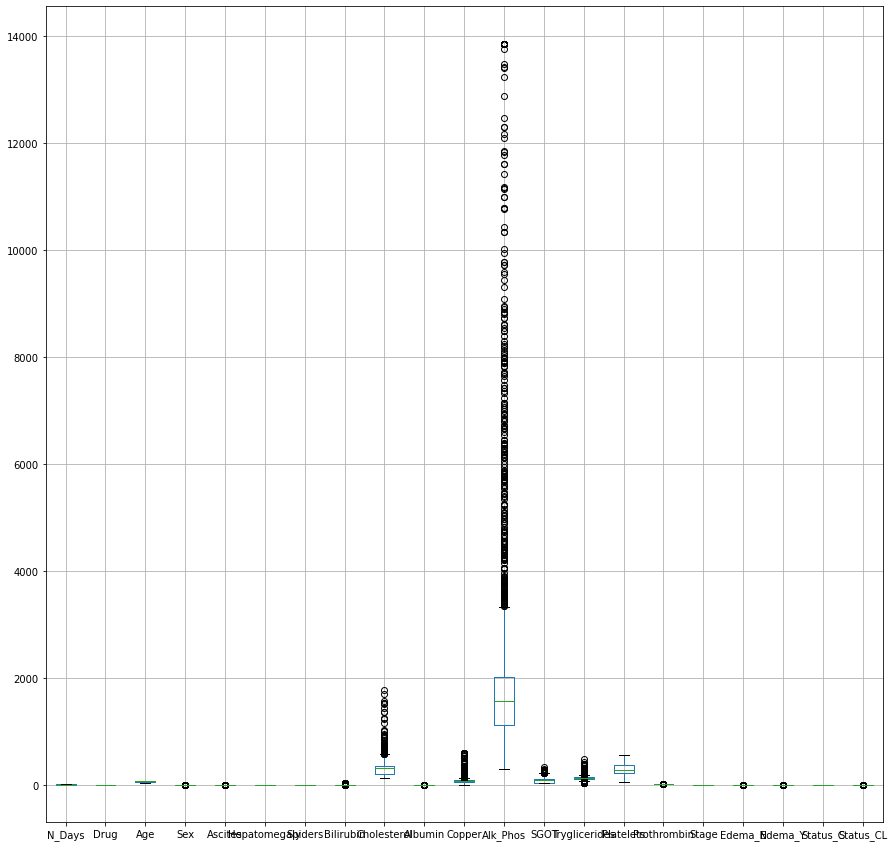

In [ ]:
df.boxplot(figsize=(15,15))

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,0,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,0.112329,0,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,5.128767,0,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2.572603,0,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


In [ ]:
for x in df.columns:
  print("datatype of {} is {}".format(x,df[x].dtype))

datatype of N_Days is float64
datatype of Drug is int64
datatype of Age is int64
datatype of Sex is int64
datatype of Ascites is float64
datatype of Hepatomegaly is float64
datatype of Spiders is float64
datatype of Bilirubin is float64
datatype of Cholesterol is float64
datatype of Albumin is float64
datatype of Copper is float64
datatype of Alk_Phos is float64
datatype of SGOT is float64
datatype of Tryglicerides is float64
datatype of Platelets is float64
datatype of Prothrombin is float64
datatype of Stage is float64
datatype of Edema_N is uint8
datatype of Edema_Y is uint8
datatype of Status_C is uint8
datatype of Status_CL is uint8


In [ ]:
df_tr = df.drop(['Edema_N','Edema_Y','Status_C','Status_CL','Stage','Sex','Ascites','Drug','Hepatomegaly','Spiders'],axis=1)
df_tr.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,4.531507,53,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2
1,0.112329,62,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8
2,0.813699,76,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3
3,5.128767,57,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5
4,2.572603,49,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4


Text(0.5, 1.0, 'Spearman Correlation Heatmap')

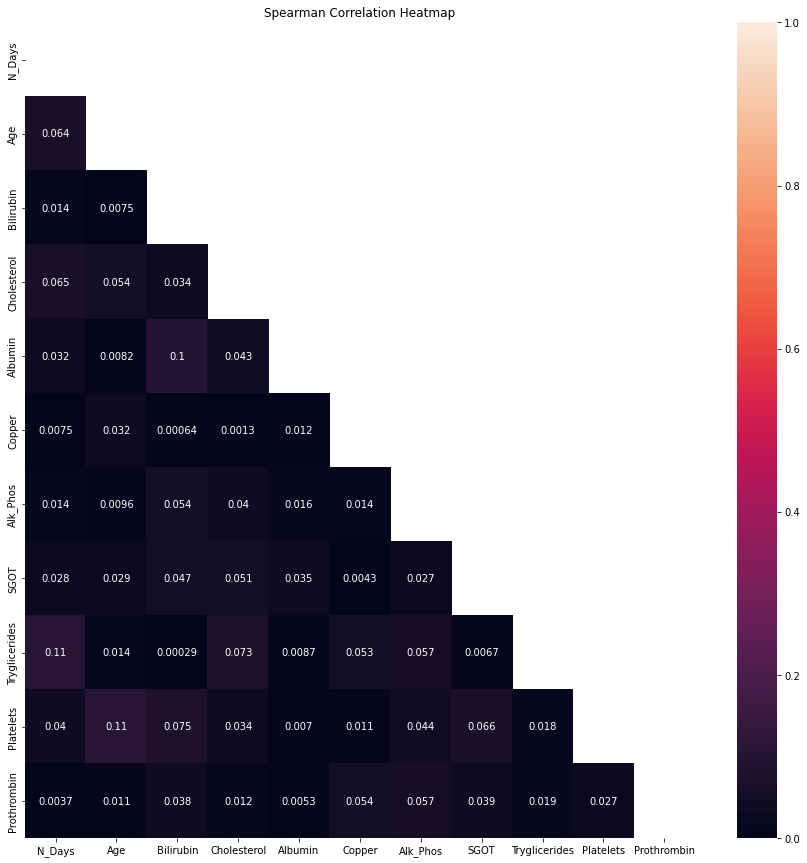

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15, 15))
spearman_corr=pd.DataFrame(df_tr.corr(method='spearman').abs())
spearman_heatmap=sns.heatmap(spearman_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(spearman_corr,dtype=bool)))
spearman_heatmap.set_title('Spearman Correlation Heatmap')

In [ ]:
def remove_cols(Correlation,thresh=0.85):
    cols=[]
    for i in Correlation.columns:
        for j in range(Correlation.columns.get_loc(i)):
            if Correlation[i][j]>=thresh:
                cols.append(i)
                print('removed {}'.format(i))
                break
    return cols

In [ ]:
cols=remove_cols(spearman_corr)

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,0,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,0.112329,0,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,4.0000,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,5.128767,0,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2.572603,0,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


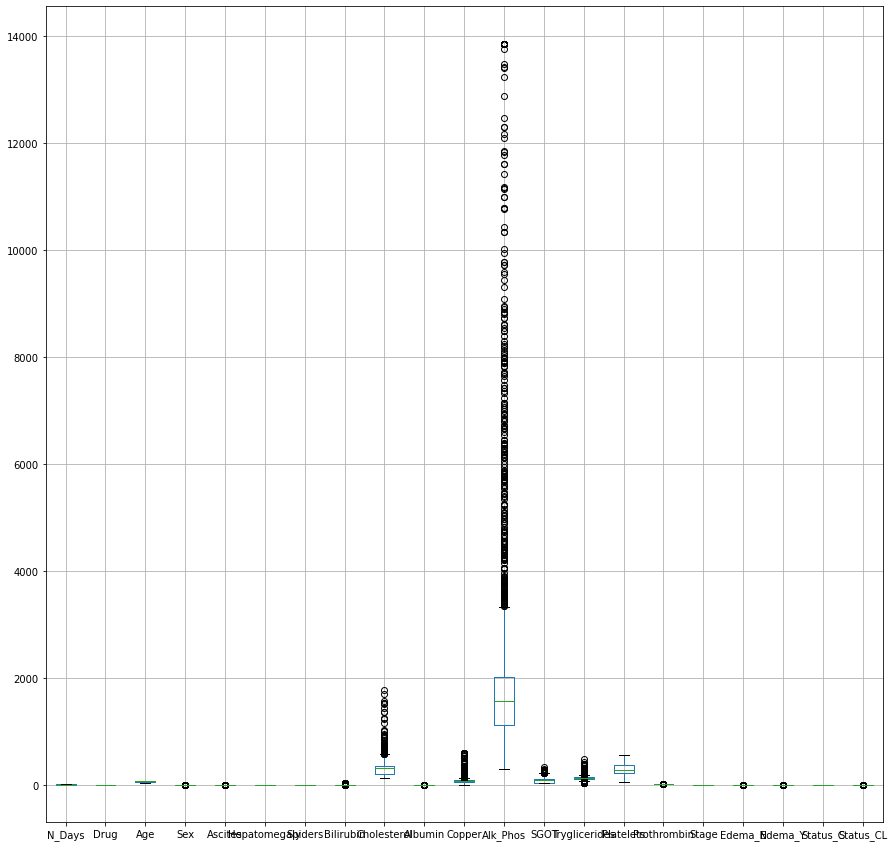

In [ ]:
df.boxplot(figsize=(15,15))

In [ ]:
treatment_columns=['Alk_Phos','Cholesterol','SGOT','Tryglicerides','Spiders']

In [ ]:
def treatment(treatment_columns):
  for i in treatment_columns:
    Q1 = df[i].quantile(0.25)
    median = df[i].quantile(0.50)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*(IQR) #Upper limit
    LL = Q1 - 1.5*(IQR) #Lower limit
    df[i] = np.where(df[i] > UL, median,df[i])
    df[i] = np.where(df[i] < LL, median,df[i])

In [ ]:
def boxplots():
  for i in treatment_columns:
    print("Boxplot of column "+i+" after treatment:")
    plt.boxplot(df[i])
    plt.show()

Columns to be treated:
['Alk_Phos', 'Cholesterol', 'SGOT', 'Tryglicerides', 'Spiders']
Boxplot of column Alk_Phos after treatment:


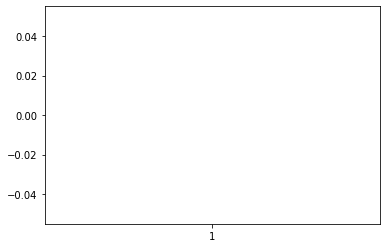

Boxplot of column Cholesterol after treatment:


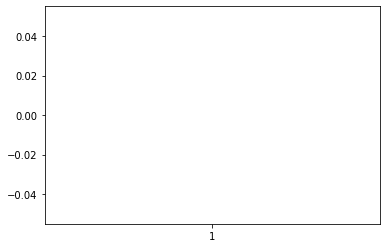

Boxplot of column SGOT after treatment:


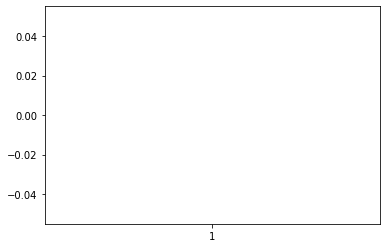

Boxplot of column Tryglicerides after treatment:


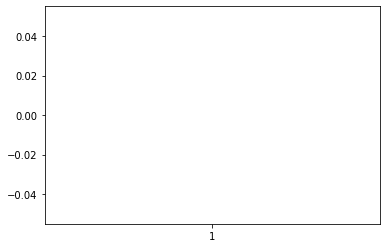

Boxplot of column Spiders after treatment:


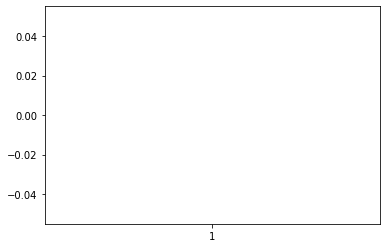

In [ ]:
print("Columns to be treated:")
print(treatment_columns)
treatment(treatment_columns)
boxplots()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


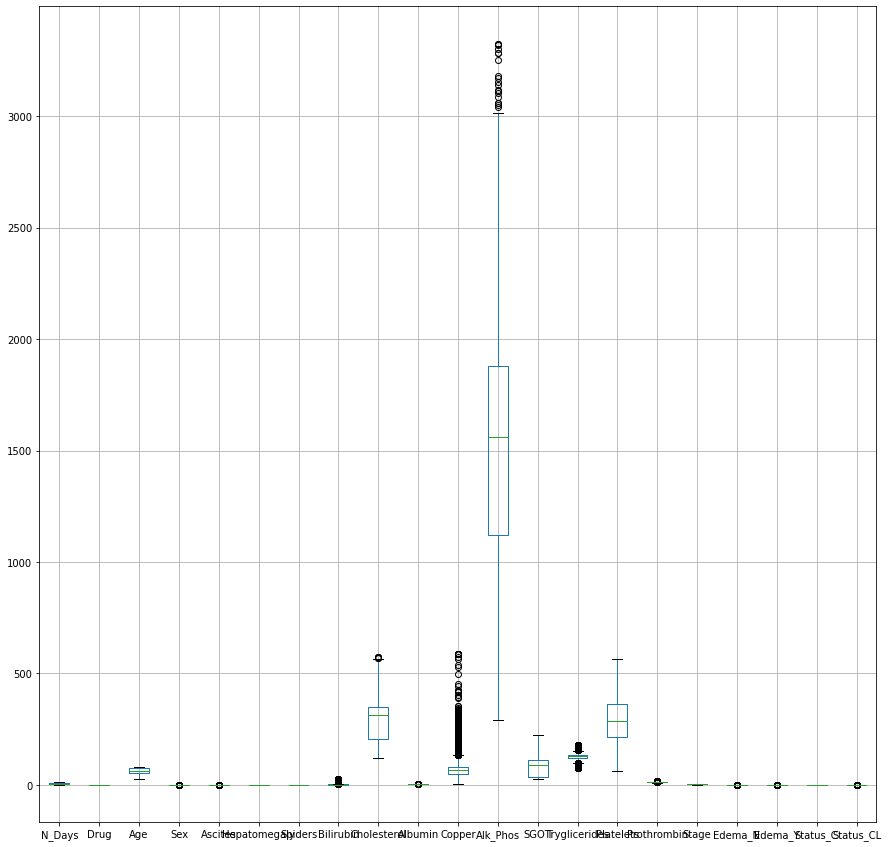

In [ ]:
df.boxplot(figsize=(15,15))

In [ ]:
treatment(['Copper'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


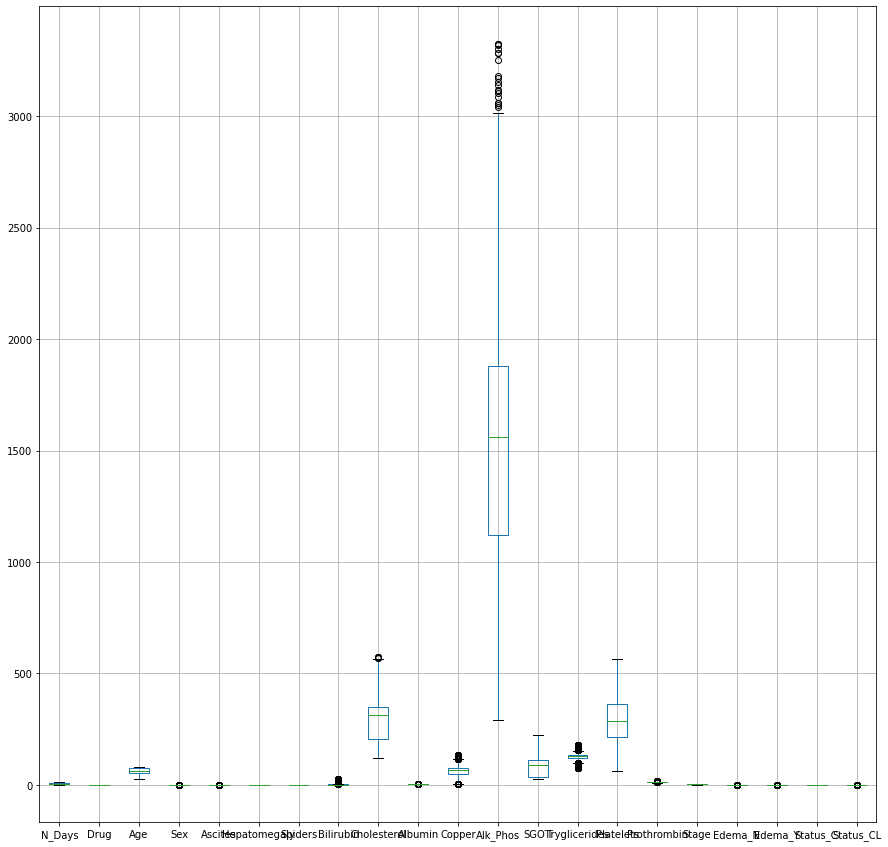

In [ ]:
df.boxplot(figsize=(15,15))

In [ ]:
treatment_columns=['Alk_Phos','Copper','Tryglicerides']
def treatment(treatment_columns):
  for i in treatment_columns:
    Q1 = df[i].quantile(0.25)
    median = df[i].quantile(0.50)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*(IQR) #Upper limit
    LL = Q1 - 1.5*(IQR) #Lower limit
    df[i] = np.where(df[i] > UL, median,df[i])
    df[i] = np.where(df[i] < LL, median,df[i])
def boxplots():
  for i in treatment_columns:
    print("Boxplot of column "+i+" after treatment:")
    plt.boxplot(df[i])
    plt.show()

treatment(treatment_columns)

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,0,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.8,99.43,109.0,293.0,10.2,4.0,1,0,0,1
1,0.112329,0,62,0,NaN,0.0,NaN,0.3,NaN,2.96,68.4645,1835.4,26.35,131.0,308.0,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,68.4645,NaN,NaN,116.0,194.0,10.3,3.0,1,0,0,0
3,5.128767,0,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,NaN,26.35,NaN,NaN,10.5,4.0,1,0,1,0
4,2.572603,0,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,NaN,104.56,NaN,306.0,11.4,2.0,1,0,0,1


In [ ]:
df.describe()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
count,6239.000000,6239.000000,6239.000000,6239.000000,4341.000000,4162.000000,3873.000000,6239.000000,3582.000000,6239.000000,6239.000000,4149.000000,4540.000000,3655.000000,5938.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000
mean,4.563833,0.356147,62.108992,0.141529,0.125547,0.418549,0.308546,1.798253,284.255723,3.035769,66.581644,1454.244637,78.404569,126.694938,293.071741,11.228180,3.152909,0.782497,0.065876,0.536304,0.078218
std,3.641593,0.478898,12.843410,0.348594,0.331376,0.493380,0.461953,3.206933,94.237011,0.528244,21.991661,614.718872,40.908773,9.421831,115.407105,1.104377,0.994867,0.412580,0.248085,0.498720,0.268535
min,0.112329,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,5.000000,289.000000,26.350000,98.000000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.300000,204.000000,2.680000,68.000000,1120.600000,35.350000,122.000000,213.000000,10.500000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,3.975342,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.400000,312.000000,3.020000,68.464500,1561.900000,88.317500,128.000000,285.000000,11.100000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,6.872603,1.000000,74.000000,0.000000,0.000000,1.000000,1.000000,1.800000,350.000000,3.390000,73.000000,1871.800000,110.182500,131.000000,364.000000,11.700000,4.000000,1.000000,0.000000,1.000000,0.000000
max,13.136986,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,28.000000,574.000000,4.640000,117.000000,3014.400000,222.090000,154.000000,563.000000,18.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
d = {'Cholesterol':df['Cholesterol'].median(),'Platelets':df['Platelets'].mean(),'Tryglicerides':df['Tryglicerides'].mean(),'SGOT':df['SGOT'].mean(),'Alk_Phos':df['Alk_Phos'].mean()}
df.fillna(value=d,inplace=True)

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_Y,Status_C,Status_CL
0,4.531507,0,53,0,0.0,0.0,1.0,0.3,279.0,2.96,84.0000,1500.800000,99.430000,109.000000,293.000000,10.2,4.0,1,0,0,1
1,0.112329,0,62,0,NaN,0.0,NaN,0.3,312.0,2.96,68.4645,1835.400000,26.350000,131.000000,308.000000,10.8,1.0,1,0,1,0
2,0.813699,0,76,0,0.0,0.0,NaN,0.3,328.0,2.64,68.4645,1454.244637,78.404569,116.000000,194.000000,10.3,3.0,1,0,0,0
3,5.128767,0,57,0,NaN,1.0,1.0,0.3,302.0,2.02,49.0000,1454.244637,26.350000,126.694938,293.071741,10.5,4.0,1,0,1,0
4,2.572603,0,49,0,NaN,NaN,NaN,0.5,344.0,3.11,91.0000,1454.244637,104.560000,126.694938,306.000000,11.4,2.0,1,0,0,1


In [ ]:
val = {'Ascites':1,"Hepatomegaly":1,'Spiders':1}
df.fillna(value=val,inplace=True)

In [ ]:
df['Drug'].unique()

array([0, 1])

In [ ]:
for x in df.columns:
  print('format of {} is {}'.format(x,df[x].dtype))

format of N_Days is float64
format of Drug is int64
format of Age is int64
format of Sex is int64
format of Ascites is float64
format of Hepatomegaly is float64
format of Spiders is float64
format of Bilirubin is float64
format of Cholesterol is float64
format of Albumin is float64
format of Copper is float64
format of Alk_Phos is float64
format of SGOT is float64
format of Tryglicerides is float64
format of Platelets is float64
format of Prothrombin is float64
format of Stage is float64
format of Edema_N is uint8
format of Edema_Y is uint8
format of Status_C is uint8
format of Status_CL is uint8


In [ ]:
df.to_csv('Rohi.csv')

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [ ]:
X = df.drop(['Stage'],axis=1)
y = df['Stage']

In [ ]:
counter=Counter(y)
print('before',counter)
oversample = RandomOverSampler(random_state = 2,sampling_strategy={1.0:900})
X, target_column = oversample.fit_resample(X, y.ravel())
counter=Counter(target_column)
print('after',counter)

before Counter({4.0: 3206, 2.0: 1390, 3.0: 1212, 1.0: 431})
after Counter({4.0: 3206, 2.0: 1390, 3.0: 1212, 1.0: 900})


In [ ]:
target_column

array([4., 1., 3., ..., 1., 1., 1.])

In [ ]:
Xm = X.values
Ym = target_column

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xm,Ym,test_size=0.33)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
 
#param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
#grid.fit(X_train, y_train)

IndentationError: ignored

In [ ]:
#print(grid.best_params_)

In [ ]:
#grid_predictions = grid.predict(X_test)
#print(classification_report(y_test, grid_predictions))

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
dftest = pd.read_csv('kok.csv')

In [ ]:
dftest.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
Xtest = dftest.values

In [ ]:
pred = clf.predict(Xtest)

In [ ]:
pred

In [ ]:
pred.to_csv('Submission',header='Stage')

In [ ]:
np.savetxt("Submission.csv", pred, fmt="%.2f",
           header="Stage")